In [34]:
from qiskit import QuantumCircuit, Aer, assemble
from qiskit.circuit import Gate
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex

import numpy as np
from math import pi

In [58]:
def draw(qc, measure=True, state_vector=False, bloch_sphere=False):
    display(qc.draw(output='mpl'))
    if(not measure or not state_vector and not bloch_sphere): return

    # Measure
    usim = Aer.get_backend('aer_simulator')
    qc.save_statevector()
    qobj = assemble(qc)
    final_state = usim.run(qobj).result().get_statevector()
    
    # Print State Vector
    if(measure and state_vector):
        display(array_to_latex(final_state, prefix="\\text{Statevector = }"))
    
    # Print Bloch Sphere of the inputs
    if(measure and bloch_sphere):
        display(plot_bloch_multivector(final_state))

In [36]:
c = 0
t = 1

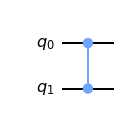

In [37]:
qc = QuantumCircuit(2)

# The controlled-Z
qc.cz(c,t)
draw(qc)

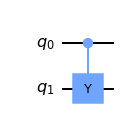

In [38]:
qc = QuantumCircuit(2)

# The controlled-Y
qc.cy(c,t)
draw(qc)

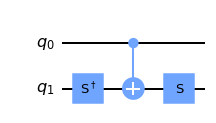

In [39]:
qc = QuantumCircuit(2)

# The controlled-Y
qc.sdg(t)
qc.cx(c,t)
qc.s(t)
draw(qc)

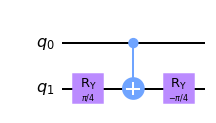

In [40]:
qc = QuantumCircuit(2)

# The controlled-H
qc.ry(pi/4,t)
qc.cx(c,t)
qc.ry(-pi/4,t)
draw(qc)

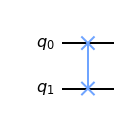

In [41]:
qc = QuantumCircuit(2)
# swaps states of qubits a and b
qc.swap(0,1)
draw(qc)

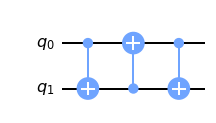

In [44]:
qc = QuantumCircuit(2)

a=0
b=1

# swaps states of qubits a and b
qc.cx(a,b)
qc.cx(b,a)
qc.cx(a,b)
draw(qc)

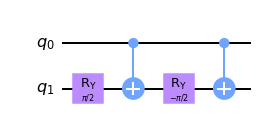

In [46]:
qc = QuantumCircuit(2)
theta = pi # theta can be anything (pi chosen arbitrarily)
qc.ry(theta/2,t)
qc.cx(c,t)
qc.ry(-theta/2,t)
qc.cx(c,t)
draw(qc)

In [54]:
A = Gate('A', 1, [])
B = Gate('B', 1, [])
C = Gate('C', 1, [])
alpha = 1 # arbitrarily define alpha to allow drawing of circuit
c = 0
t = 1

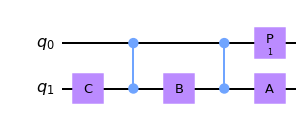

In [59]:
qc = QuantumCircuit(2)
qc.append(C, [t])
qc.cz(c,t)
qc.append(B, [t])
qc.cz(c,t)
qc.append(A, [t])
qc.p(alpha,c)
draw(qc)